In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

(0.0, 10.0)

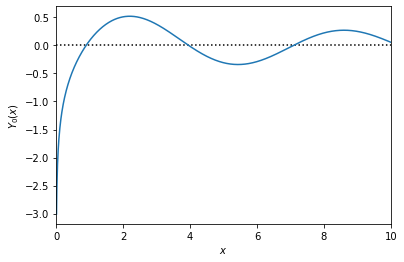

In [28]:
# Exercise 1

from scipy.special import yv

# order of the Bessel function
a = 0

x = np.arange(0, 10.01, 0.01)
y = yv(a, x)

plt.xlabel('$x$')
plt.ylabel('$Y_0(x)$')
plt.plot(x, y)
plt.hlines(0, 0, 10, linestyle=':')
plt.xlim(0, 10)

In [30]:
# Find third root
from scipy.optimize import fsolve

def f(z, a):
    return yv(a, z)

r = optimize.fsolve(f, 7, args=a)
r

array([7.08605106])

In [32]:
# alternate approach (from Steven)
def f(x):
    return yv(0, x)

r, info, flag, mesg = fsolve(f, 7, full_output=True)
print(mesg)
r

The solution converged.


array([7.08605106])

In [14]:
# Exercise 2
from scipy.integrate import quad

# third root
r = fsolve(f, 7, args=a)
print(quad(f, 0, r, args=a))

(-0.29488939975237555, 8.26664958708534e-10)


[ 0.59198141  1.55221614  2.51245087  3.47268561  4.43292034  5.39315507
  6.35338981  7.31362454  8.27385928  9.23409401 10.19432874]


[1.0720987719129387,
 2.0323335057275607,
 2.992568239542182,
 3.9528029733568038,
 4.9130377071714255,
 5.873272440986047,
 6.833507174800669,
 7.79374190861529,
 8.753976642429912,
 9.714211376244535]

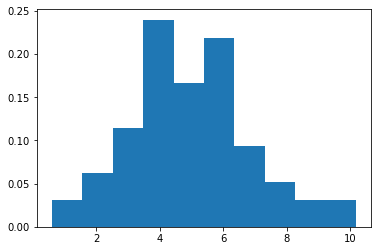

In [64]:
# Exercise 3
from scipy.stats import norm

np.random.seed(111)

# newer method for giving a seed
# allows you to have multiple random number generators which maintain their state, with separate seeds
rnd = np.random.RandomState(111)

n = 100
m = 5
s = 2
x = norm.rvs(m, s, size=n) # specify pdf parameters

hy, bins, patches = plt.hist(x, density=True, bins=10)
print(bins)

centres = []
for i in range(0, len(bins)-1):
    centres.append(0.5 * (bins[i] + bins[i+1]))
centres

In [65]:
# alternate for getting centres
# average the edges

# get width of bins and hence normalisation
w = bins[1]-bins[0]
amp = n*w
# first term: all edges except LH edge
# last term: all edges except RH edge
hxc = 0.5*(bins[:-1] + bins[1:])

201


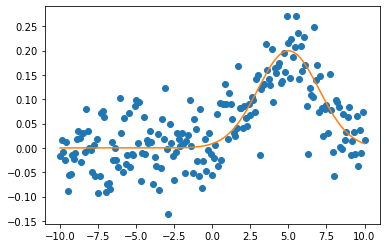

In [66]:
# Exercise 4

import scipy.stats as stats

def f(m, s, a, x, y):
    model = stats.norm(m, s)
    return np.sum((y - a * model.pdf(x))**2)

np.random.seed(12345)

# General principle: declare variables explicitly if they will come up again
# If they do not come up again, don't,
# e.g. if these don't come up again, write p = stats.norm(loc=5, scale=2)
m = 5
s = 2
a = 1
p = stats.norm(m, s)
x = np.arange(-10, 10.01, 0.1)
print(len(x))
n = a * p.pdf(x)

np.random.seed(15)

noise = norm.rvs(0., 0.05, size=len(x))
data = a * p.pdf(x) + noise
f(m, s, a, x, data)

plt.plot(x, data, 'o')
plt.plot(x, n)


In [7]:
stats.norm.fit?

In [67]:
# Exercise 5
from scipy import optimize

#optimize.minimize(model, (0, 0, 0, x, y), args=(m, s, a, x, y))

model = stats.norm(m, s)
realvalues = model.pdf(x)

mu, sigma = stats.norm.fit(realvalues)
print(mu, sigma)

0.0494636524427771 0.06759723168271757


## Steven's method

In [69]:
# returns the value of a Gaussian with specified amplitude,
# mean and sigma, evaluated at x (just for convenience)
def g(p, a, x):
    m, s = p
    return a * stats.norm.pdf(x, m, s)
# put p = (m, s) with arguments together, first, since you want to optimise this using fsolve!


# returns chisq of a specified Gaussianfor data(x, y)
def f(p, a, x, y):
    return ((y - g(p, a, x))**2).sum()


# find parameter set which minimises chisq
# Specify parameter bounds
results = optimize.minimize(f, (3, 3), args=(a, centres, hy), bounds=((None, None), (1e-6, None)))
print(results)


# get fit parameters
r1 = results.x

      fun: 0.007509257288716743
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.76247906e-07,  3.92481189e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 39
      nit: 10
     njev: 13
   status: 0
  success: True
        x: array([4.78821221, 1.83682696])


In [77]:
# use MLE method provided in stats (actually understands that this is samples from a distribution)
r2 = stats.norm.fit(centres)

true function:  mean = 5.000, sigma = 2.000
optimize.fmin:  mean = 4.788, sigma = 1.837
stats.norm.fit: mean = 5.393, sigma = 2.758


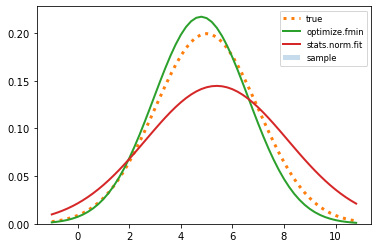

In [78]:
# plot true function and fit results over histogram
x = np.arange(m-3*s, m+3*s, s/10.0)
plt.hist(d, bins=centres, histtype='stepfilled', linestyle=None,
         alpha=0.25, label='sample')
plt.plot(x, g((m, s), a, x), ':', label='true', lw=3)
plt.plot(x, g(r1, a, x), label='optimize.fmin', lw=2)
plt.plot(x, g(r2, a, x), label='stats.norm.fit', lw=2)
plt.legend(prop={'size':'small'})

# neatly print results to screen
print('true function:  mean = {:5.3f}, sigma = {:5.3f}'.format(m, s))
print('optimize.fmin:  mean = {:5.3f}, sigma = {:5.3f}'.format(*r1))
print('stats.norm.fit: mean = {:5.3f}, sigma = {:5.3f}'.format(*r2))